# Class 10: Data visualization continued

Plan for today:
- Review and continuaton of data visualization using matplotlib
- If there is time: Data visualization using seaborn


## Notes on the class Jupyter setup

If you have the *ydata123_2024a* environment set up correctly, you can get the class code using the code below (which presumably you've already done given that you are seeing this notebook). 

In [41]:
import YData

# YData.download.download_class_code(9)   # get class code    
# YData.download.download_class_code(9, True)  # get the code with the answers 

#YData.download.download_data("monthly_egg_prices.csv")
#YData.download.download_data("US_Gasoline_Prices_Weekly.csv")

import urllib.request
basename = "https://raw.githubusercontent.com/emeyers/YData/main/ClassMaterial/data/" 
urllib.request.urlretrieve(basename + "monthly_egg_prices.csv", "monthly_egg_prices.csv")
urllib.request.urlretrieve(basename + "US_Gasoline_Prices_Weekly.csv", "US_Gasoline_Prices_Weekly.csv")

('US_Gasoline_Prices_Weekly.csv', <http.client.HTTPMessage at 0x1775c0890>)

There are also similar functions to download the homework:

In [42]:
#YData.download.download_homework(4)  # downloads the homework 

If you are using colabs, you should install polars and the YData packages by uncommenting and running the code below.

In [43]:
# !pip install https://github.com/emeyers/YData_package/tarball/master

If you are using google colabs, you should also uncomment and run the code below to mount the your google drive

In [44]:
# from google.colab import drive
# drive.mount('/content/drive')

In [45]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Data visualization continued!

Let's review and continue using additional features of the matplotlib package to visualize data. 

### Let's continunig visualizing whether egg or gas costs more

To start, let's run our data wrangling code again...

In [54]:
egg_prices = pd.read_csv("monthly_egg_prices.csv", parse_dates=[0], date_format="%m/%d/%y")
egg_prices.head(3)

,DATE,Price
0,1980-01-01,0.879
1,1980-02-01,0.774
2,1980-03-01,0.812


In [55]:
gas_prices = pd.read_csv("US_Gasoline_Prices_Weekly.csv", parse_dates=[0], date_format="%m/%d/%y")
gas_prices['Week'] = pd.to_datetime(gas_prices['Week'], format="%m/%d/%Y")

gas_prices.head(3)


,Week,DollarsPerGallon
0,2024-01-15,3.058
1,2024-01-08,3.073
2,2024-01-01,3.089


In [56]:
# Use an inner join to merge the egg and gas prices
# Q: what should the left_on and right_on arguments be set to?  
prices = egg_prices.merge(gas_prices, how = "inner", left_on = "DATE", right_on = "Week")

prices.head(3)

,DATE,Price,Week,DollarsPerGallon
0,1990-10-01,1.012,1990-10-01,1.321
1,1991-04-01,1.002,1991-04-01,1.052
2,1991-07-01,0.966,1991-07-01,1.104


In [57]:
# only keep the columns we need which are: the week, and the prices of eggs and gas
prices = prices[["Week", "Price", "DollarsPerGallon"]]

prices.head(3)

,Week,Price,DollarsPerGallon
0,1990-10-01,1.012,1.321
1,1991-04-01,1.002,1.052
2,1991-07-01,0.966,1.104


In [58]:
# rename the egg prices to "Eggs" and the gas prices to "Gas"

prices = prices.rename(columns = {"Price": "Eggs", "DollarsPerGallon":"Gas"})
prices.head(3)


,Week,Eggs,Gas
0,1990-10-01,1.012,1.321
1,1991-04-01,1.002,1.052
2,1991-07-01,0.966,1.104


#### Now let's visualize the data!

Let's now visualize the egg and gas prices.


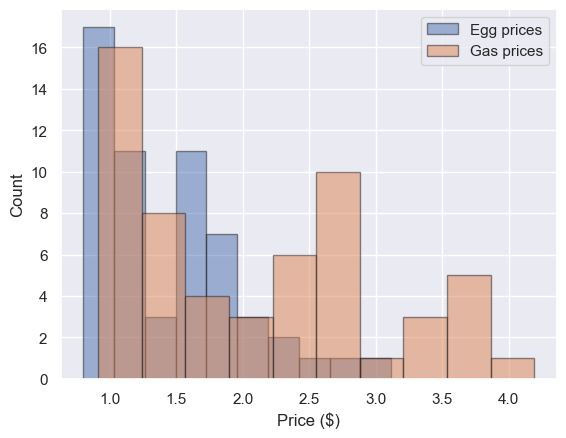

In [59]:
# Plot overlapping histograms of the egg and gas prices.

plt.hist(prices.Eggs, edgecolor = "k", alpha = .5, label = "Egg prices");
plt.hist(prices.Gas, edgecolor = "k", alpha = .5, label = "Gas prices");
plt.legend();
plt.xlabel("Price ($)");
plt.ylabel("Count");

### Boxplots

Boxplots are a visualization of the 5 number summary which is: min, Q1, median, Q3 and max (where Q1 is the 25th quantile, and Q3 is the 75h quantile). 

We can get quantiles using `np.quantile(ndarray, proportion)`.

We can create boxplots using the `plt.boxplot()` function. 


In [1]:
# Can you calculate the 5 number summary for the egg prices? 

# get Q1, median, Q3


# another way to get the median


# get the min and max



In [2]:
# boxplot of egg prices




In [3]:
# plot side-by-side box plots




### Time series

Let's compare the time series for gas and egg prices...


In [4]:
# Let's compare gas and egg prices as time series





### Scatter plots

We can create a simple scatter plots using: `plt.plot()`

For more complex scatter plots we can use: `plot.scatter()`

Let's start by looking at the simple `plt.plot()`

In [5]:
# Create a basic scatter plot of Egg prices vs. Gas prices using plt.plot()





Let's now create a DataFrame called `prices2` which is the same as our `prices` DataFrame but it also has an additional column called `after2000`. We will use this column to plots points before the year 2000 in a different color than points after 2000. 

In particular, the `after2000` column should be set to the string "red" for points that occur before 2000 and to the string "green" for points that occured after 2000. 


In [6]:
# Add a column called "before2000" which has values that are 
# "green" for years before 2000, "red" for years after 2000






In [7]:
# Create a fancier scatter plot of Egg prices vs. Gas prices using plt.scatter()






### Subplot: the pyplot interface

There are two ways to create subplots in matplotlib using either:

1. The pyplot interface
2. The axes interface

To create subplots using the pyplot interface we can use the `subplot` function:

`plt.subplot(num_rows, num_cols, curr_plot_num);`
`plt.plot(x, y);`


In [8]:
# change the figure size


# subplots








### Using matplotlib as a general canvas

We can use matplotlib as a general canvas to create illustrations as well. For example, in my YData baseball class we drew a baseball diamond and updated where runners were on base.

Let's explore this very briefly...


In [9]:
        
# draw the baseball diamond
#plt.plot([0, 1], [0, 1], color = "black");
#plt.plot([1, 0], [1, 2], color = "black");
#plt.plot([0, -1], [2, 1], color = "black");
#plt.plot([-1, 0], [1, 0], color = "black");

# make the axes square


# put a runner on first


# turn off the axis


# make the field green 



## Seaborn!

[Seaborn](https://seaborn.pydata.org/index.html) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. 

I.e., it is built on top of of matplotlib but produces better looking plots that are easier to create. 

Let's start by examining different themes which can produce better looking plots. We can do this using the `sns.set_theme()` method. 


In [10]:
# Import seaborn
import seaborn as sns

# Apply the default theme
# default style is 'darkgrid')


# Side note: Matplotlib also has themes
# plt.style.available
# plt.style.use('fivethirtyeight')


# Re-create a line plot of gas prices over time here




### Plotting relationships between two quantitative variables

We can plot relationships between two quantitative variables using the `sns.relplot()` function


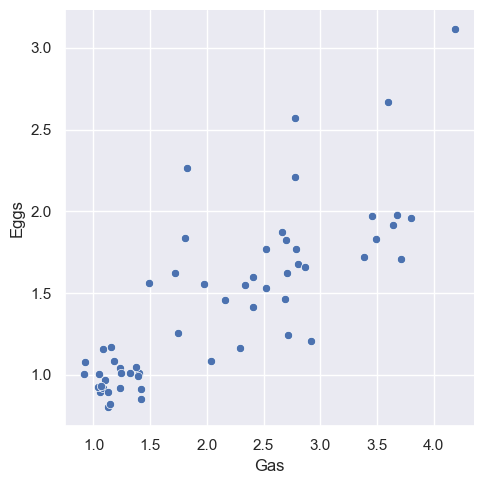

In [70]:
# plot relationship between gas and egg prices



#### Penguins!

Let's continue to explore the relplot using data on penguins. 

We will also look at mapping other features of our data onto visual properties including: 
- `x`, and `y` column names to be plotted (as we have done before)
- `hue`: The column name to be mapped to the color of the points
- `size`: The column name to be mapped to the size of points
- `style`: The column name to be mapped to the style of the markers
- `col`: fThe column name to be mapped to faceting to compare multiple subplots


In [71]:
# Let's look at some penguins
penguins = sns.load_dataset("penguins")

print(type(penguins))

penguins.head()


<class 'pandas.core.frame.DataFrame'>


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [11]:
# plotting bill size on x, and y axes and other properties







### Plotting a single quantitative variable

We can plot a single quantitative variables using the `sns.displot()` function.

Properties we can set include
- `x`: The name of the data column you want to plot
- `hue`: The name of the column that colors each point
- `kind` The type of plot

Different options for `kind` are: “hist”, “kde”, “ecdf”


In [12]:
# plot the flipper length






### Plotting a quantitative variable for different categorical variable levels

We can plot a quantitative variable for different categorical variable levels using the `sns.catplot()` function.

We specify: 
- `x`: Cateogoral x-value column name
- `y`: Quantitative y-value column name
- `kind`: The type of plot

The `kind` argument can be set to the following: “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”


In [13]:
# plot flipper length for the different species using different kinds of plots






# also try “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, or “bar”

### Pair plots

One of the most useful visualizations for exploring the relationships between several quantitative variables is to create a "pairs plot" which creates a series of scatter plots between all quantitative variables in the data. 

We can do this in seaborn using the `sns.pairplot(data)` function!

In [14]:
# Create pair plots for the different varaibles in the penguins data set




<img src = "https://i.imgflip.com/1ezfdq.jpg">

## Interactive data visualizations with plotly

Let's now look at interactive visualizations using the [plotly express package](https://plotly.com/python/plotly-express/). 

Interactive visualizations can't be used with statitic report (such as the pdf used for your class project) but they are useful for exploring data to understand key trends, and these types of graphics can be embedded in webpages. 

Let's start with our favoriate data set to visualize, the gapminder data! The gapminder data comes with the plotly package and can be loaded using the code below.



In [1]:
import plotly.express as px

gapminder = px.data.gapminder()   # the plotly package comes with the gapminder data

print(type(gapminder))

gapminder.head(3)

<class 'pandas.core.frame.DataFrame'>


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4


Let's now get the the gapminder data from 2007. As you know, we can do this using Boolean masking. We can also do this using the `.query()` method!


In [2]:
gapminder_2007 = gapminder[gapminder['year'] == 2007]

gapminder_2007_alt = gapminder.query("year==2007")

gapminder_2007.equals(gapminder_2007_alt)


True

Note if we use the `.query()` method with a column that contains strings, we need to use nested strings to get appropriate rows.

In [3]:
# Get only countries in Asia using the .query() method






,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4


### Line plots

Let's create a line plot showing life expectancy as a function of the year using the `px.line()` method. In particular, let's set the followign properties of the plot: 

- `x`: Year
- `y`: Life expectancy
- `color`: The continent
- `line_group`: The country
- `hover_name`: The country
- `line_shape`: spline
- `render_mode`: svg to use svg graphics

What do you think of this plot? 

### Scatter plots

Let's now recreate our scatter plot of country life expectancy as a function of GDP per capita using the `gapminder_2007` data using plotly. In particularly, we can use the `px.scatter(data_frame = , x = , y = , ...)` method which works similar to seaborn's `sns.relplot()` function. 

Let's try out the `px.scatter(data_frame = , x = , y = , ...)` function use the following mappings: 

- `x`: GDP per capita
- `y`: Life Expectancy
- `size`:  The country population
- `color`: Continent 

We can also set the following properties:

- `hover_name`: The name of the country
- `log_x`: Set it to True to make the x-axis on a log10 scale
- `max_size`: Set it to 60 to make the scaling for the population display better

Finally, if we want to have separate facets for columns we can use `facet_col`.



In [15]:
# Create a scatter plot in plotly




# Add axis labels



